# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('lobster.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Lobster
Produksi Hasil Tangkap Laut,
2017-01-01,0.920
2017-02-01,0.890
2017-03-01,0.910
2017-04-01,0.930
2017-05-01,0.970
2017-06-01,0.990
2017-07-01,0.920
2017-08-01,0.940
2017-09-01,0.930


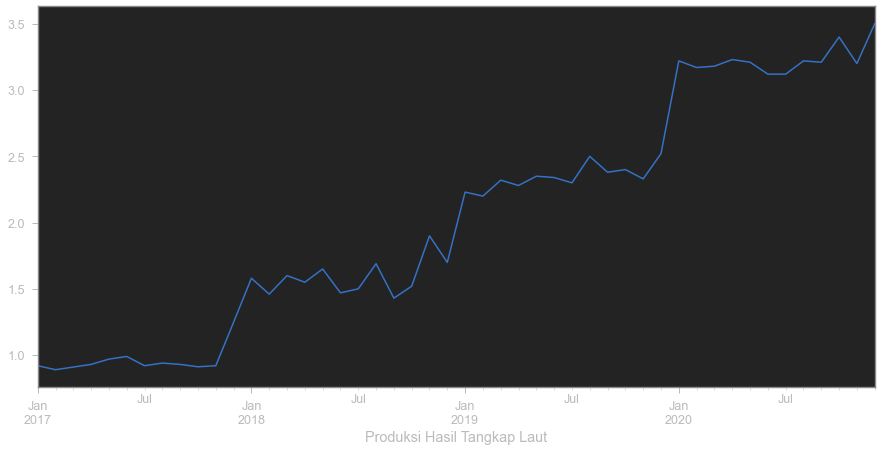

In [3]:
data['Lobster'].plot(figsize=(15,7));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Lobster'])

Augmented Dickey-Fuller Test:
ADF test statistic       0.734066
p-value                  0.990494
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-stationary

## 4. Differencing

In [5]:
data['Lobster d1'] = diff(data['Lobster'], k_diff=1)     #lag 1
# cek stationarity again
adfuller_test(data['Lobster d1'])

Augmented Dickey-Fuller Test:
ADF test statistic      -5.393188
p-value                  0.000004
# lags used             10.000000
# observations          36.000000
critical value (1%)     -3.626652
critical value (5%)     -2.945951
critical value (10%)    -2.611671

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is stationary!

## 5. Check Seasonality Data

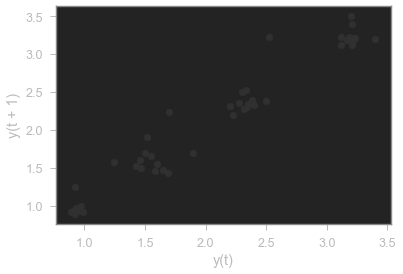

In [6]:
# With lag plot
lag_plot(data['Lobster']);

terdapat trend dan seasonality

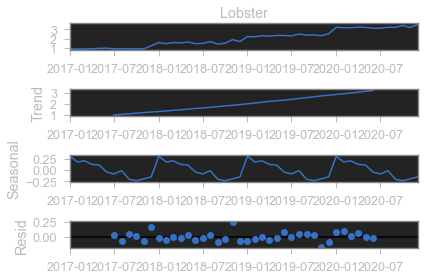

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Lobster'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY. Gunakan SARIMA MODEL

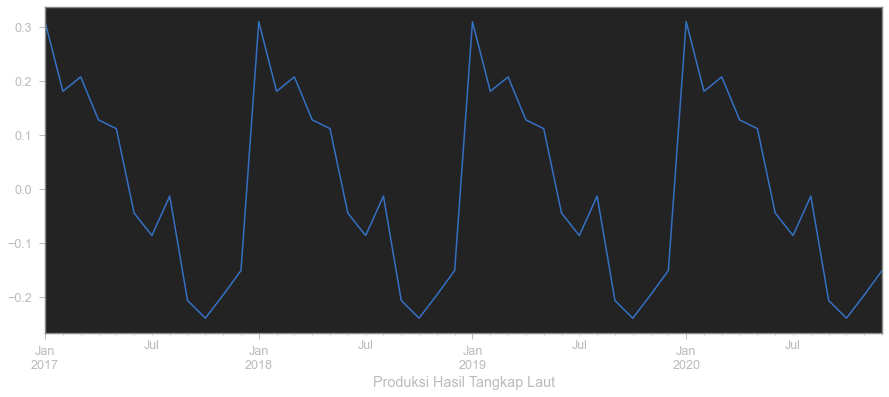

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

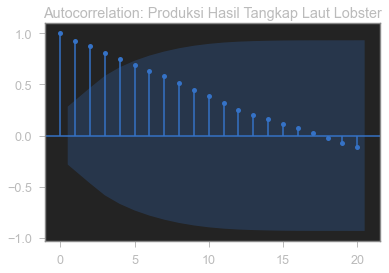

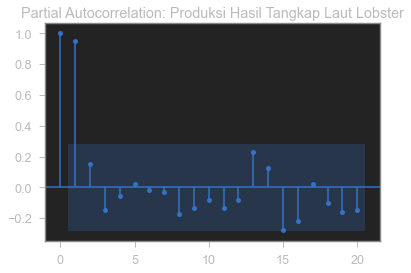

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Lobster'
plot_acf(data['Lobster'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Lobster'
plot_pacf(data['Lobster'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Lobster'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-35.951, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-23.232, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-32.583, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-31.006, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-21.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-34.931, Time=0.94 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-33.338, Time=2.16 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-20.862, Time=0.39 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-30.818, Time=1.02 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-34.575, Time=1.24 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-38.502, Time=0.65 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=in

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

Gunakan model (0,1,1)(1,0,1,12)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Lobster'].iloc[:-6]
test_data = data['Lobster'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01    0.920
 2017-02-01    0.890
 2017-03-01    0.910
 2017-04-01    0.930
 2017-05-01    0.970
 2017-06-01    0.990
 2017-07-01    0.920
 2017-08-01    0.940
 2017-09-01    0.930
 2017-10-01    0.912
 2017-11-01    0.920
 2017-12-01    1.248
 2018-01-01    1.580
 2018-02-01    1.460
 2018-03-01    1.600
 2018-04-01    1.550
 2018-05-01    1.650
 2018-06-01    1.470
 2018-07-01    1.500
 2018-08-01    1.690
 2018-09-01    1.430
 2018-10-01    1.520
 2018-11-01    1.900
 2018-12-01    1.700
 2019-01-01    2.230
 2019-02-01    2.200
 2019-03-01    2.320
 2019-04-01    2.280
 2019-05-01    2.350
 2019-06-01    2.340
 2019-07-01    2.300
 2019-08-01    2.500
 2019-09-01    2.380
 2019-10-01    2.400
 2019-11-01    2.330
 2019-12-01    2.520
 2020-01-01    3.220
 2020-02-01    3.170
 2020-03-01    3.180
 2020-04-01    3.230
 2020-05-01    3.210
 2020-06-01    3.120
 Freq: MS, Name: Lobster, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    3.1

## 8. SARIMA Train Model

SARIMA(1,1,0)(1,1,0,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(0,1,1), seasonal_order=(1,0,1,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Lobster   No. Observations:                   42
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  18.671
Date:                            Sun, 12 Dec 2021   AIC                            -29.341
Time:                                    20:27:41   BIC                            -22.487
Sample:                                01-01-2017   HQIC                           -26.845
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4243      0.161     -2.638      0.008      -0.740      -0.109
ar.S.L12       0.9991      0.137      7.317      0.000       0.731       1.267
ma.S.L12      -0.9307      5.298     -0.176      0.861     -11.314       9.453
sigma2         0.0124      0.064      0.194      0.846      -0.113       0.138
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 3.53
Prob(Q):                              0.41   Prob(JB):                         0.17
Heteroskedasticity (H):               1.64   Skew:                             0.37
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,1,0,12) Prediction')
prediction_test

2020-07-01    3.122658
2020-08-01    3.245892
2020-09-01    3.128887
2020-10-01    3.156497
2020-11-01    3.251342
2020-12-01    3.346480
Freq: MS, Name: SARIMA(1,1,0)(1,1,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

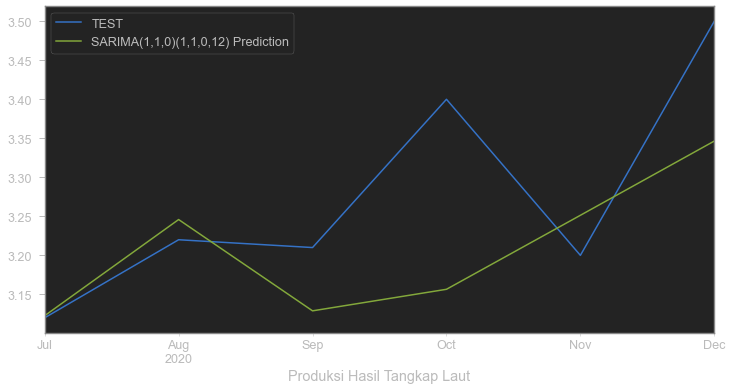

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

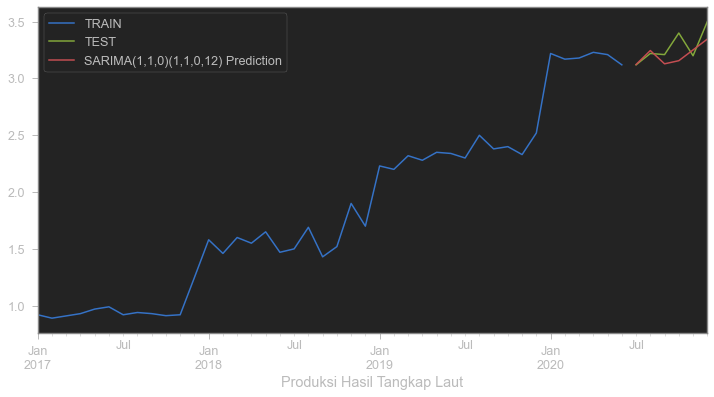

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'ARIMA(1,1,0) RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'ARIMA(1,1,0) AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 1.8526190476190476
Standard Deviation Train data --> 0.7730626438624856


ARIMA(1,1,0) RMSE Error: 0.1243347355
ARIMA(1,1,0) AIC: -29.341


Mean Test data --> 3.2750000000000004
Mean Prediction results --> 3.2086259520920435


## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Lobster'], order=(1,1,0), seasonal_order=(1,1,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Lobster   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  15.449
Date:                            Sun, 12 Dec 2021   AIC                            -24.898
Time:                                    20:27:43   BIC                            -20.232
Sample:                                01-01-2017   HQIC                           -23.287
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4679      0.155     -3.011      0.003      -0.772      -0.163
ar.S.L12      -0.4741      0.115     -4.120      0.000      -0.700      -0.249
sigma2         0.0220      0.005      4.497      0.000       0.012       0.032
===================================================================================
Ljung-Box (L1) (Q):                   2.61   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.11   Prob(JB):                         0.77
Heteroskedasticity (H):               0.95   Skew:                             0.00
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,1,0,12) Forecast')
forecast

2021-01-01    3.981430
2021-02-01    4.005465
2021-03-01    4.037413
2021-04-01    4.058875
2021-05-01    4.074933
2021-06-01    4.025954
Freq: MS, Name: SARIMA(1,1,0)(1,1,0,12) Forecast, dtype: float64

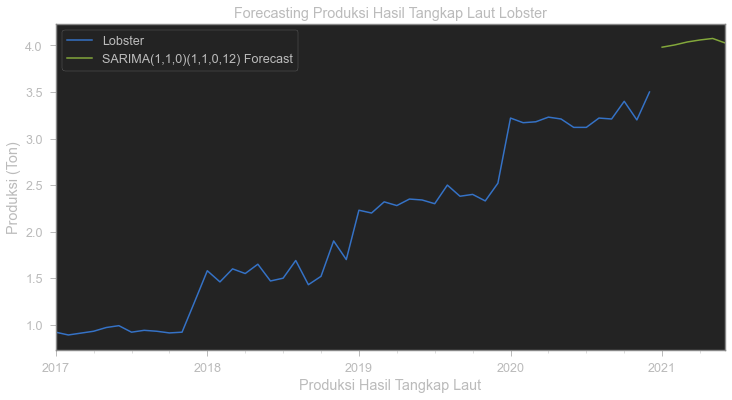

In [19]:
# PLOT
data['Lobster'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Lobster', ylabel='Produksi (Ton)');

In [20]:
# save model
model_SARIMA.save('model_lobster.pkl')